## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [112]:
import numpy as np

def max_element(arr):
    #создаём булеву маску: True там, где элемент идёт сразу после нуля
    is_after_zero = np.concatenate(([False], arr[:-1] == 0))
    
    #Выбираем элементы, идущие после нуля
    candidates = arr[is_after_zero]
    
    #если таких элементов нет — возвращаем None
    if candidates.size == 0:
        return None
    
    # Возвращаем максимальный из них
    return np.max(candidates)


x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
result = max_element(x)
print("Максимальный элемент после нуля:", result)

Максимальный элемент после нуля: 5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [113]:
import numpy as np

def nearest_value(X, v):
    #Находим индекс элемента с минимальной абсолютной разницей до v
    idx = np.argmin(np.abs(X - v))
    # Возвращаем соответствующий элемент из "развёрнутой" матрицы
    return X.flat[idx]

X = np.arange(0, 10).reshape((2, 5))
v = 3.6
result = nearest_value(X, v)
print("Ближайший элемент к", v, ":", result)

Ближайший элемент к 3.6 : 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [117]:
import numpy as np

def scale(X):
    # Вычисляем среднее по каждому столбцу
    mean = X.mean(axis=0)
    # Центрируем данные (вычитаем среднее)
    centered = X - mean
    #Считаем стандартное отклонение
    std = X.std(axis=0, ddof=0)
    # Защищаемся от деления на ноль- заменяем нулевые std на 1
    std_replaced = np.where(std == 0, 1.0, std)
    # масштабируем
    return centered / std_replaced

# Генерируем случайную матрицу для теста
test_matrix = np.random.randint(0, 10, size=(4, 3))

print("Исходная матрица:")
print(test_matrix)

scaled = scale(test_matrix)
print("\nМасштабированная матрица:")
print(scaled)

# Проверка корректности
print("\nСреднее по столбцам после масштабирования:")
print(scaled.mean(axis=0))

print("\nСтандартное отклонение по столбцам после масштабирования")
print(scaled.std(axis=0, ddof=0))

Исходная матрица:
[[4 3 0]
 [3 5 0]
 [2 3 8]
 [1 3 3]]

Масштабированная матрица:
[[ 1.34164079 -0.57735027 -0.84119102]
 [ 0.4472136   1.73205081 -0.84119102]
 [-0.4472136  -0.57735027  1.60591014]
 [-1.34164079 -0.57735027  0.07647191]]

Среднее по столбцам после масштабирования:
[ 0.00000000e+00 -5.55111512e-17 -3.46944695e-18]

Стандартное отклонение по столбцам после масштабирования
[1. 1. 1.]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [29]:
import numpy as np

def get_stats(X):
    # Вычисляем все требуемые характеристики
    determinant = np.linalg.det(X)
    trace = np.trace(X)
    min_element = X.min()
    max_element = X.max()
    frobenius_norm = np.linalg.norm(X, 'fro')
    eigenvalues = np.linalg.eigvals(X)
    inverse_matrix = np.linalg.inv(X)
    
    # Возвращаем результаты в указанном порядке
    return (determinant, trace, min_element, max_element, 
            frobenius_norm, eigenvalues, inverse_matrix)

# Генерация тестовой матрицы из N(10, 1)
test_matrix = np.random.normal(loc=10, scale=1, size=(3, 3))

# Получение статистик
det, tr, min_val, max_val, fro_norm, eigvals, inv = get_stats(test_matrix)

# Вывод результатов
print("Исходная матрица:")
print(test_matrix.round(2))
print("\nОпределитель:", det.round(2))
print("След:", tr.round(2))
print("Минимальный элемент:", min_val.round(2))
print("Максимальный элемент:", max_val.round(2))
print("Норма Фробениуса:", fro_norm.round(2))
print("Собственные числа:", eigvals.round(2))
print("\nОбратная матрица:")
print(inv.round(2))

Исходная матрица:
[[ 9.77 10.49 10.39]
 [ 9.15 10.18 10.66]
 [10.13 10.11  9.15]]

Определитель: 1.34
След: 29.1
Минимальный элемент: 9.15
Максимальный элемент: 10.66
Норма Фробениуса: 30.05
Собственные числа: [30.01 -0.05 -0.85]

Обратная матрица:
[[-10.97   6.78   4.55]
 [ 18.13 -11.83  -6.8 ]
 [ -7.89   5.57   2.59]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [58]:
import numpy as np

# Массив для хранения максимальных элементов
max_elements = []

for exp_num in range(100):
    # Генерируем две матрицы 10x10 из стандартного нормального распределения
    A = np.random.normal(0, 1, (10, 10))
    B = np.random.normal(0, 1, (10, 10))
    
    # Перемножаем матрицы
    C = A @ B
    
    # Находим максимальный элемент
    max_val = np.max(C)
    
    # Сохраняем результат
    max_elements.append(max_val)

# Преобразуем в numpy массив для удобства вычислений
max_elements = np.array(max_elements)

# Вычисляем среднее значение
mean_value = np.mean(max_elements)

# Вычисляем 95-процентную квантиль
quantile_95 = np.percentile(max_elements, 95)

print("\nМатрица А:",A.round(2))
print("\nМатрица B:",B.round(2))

# Выводим результаты
print(f"Среднее значение максимальных элементов: {mean_value:.4f}")
print(f"95-процентная квантиль: {quantile_95:.4f}")

print("\nПервые 10 максимальных элементов:")
for i, val in enumerate(max_elements[:10]):
    print(f"Эксперимент {i+1}: {val:.4f}")


Матрица А: [[ 1.09 -0.45  1.04 -0.16 -0.65  0.01  0.01 -0.96 -0.57 -0.54]
 [-0.24 -0.36 -0.38 -0.36 -1.22  0.41 -0.65  1.42  0.77  0.16]
 [-1.09  2.23 -0.67 -0.02 -0.96  1.61 -1.46  1.02 -0.9   0.78]
 [ 0.29  0.23 -0.61 -0.33 -1.06  0.56  1.37  1.01  0.45  1.15]
 [ 1.09 -0.05 -1.25  2.17  0.08  1.39  0.62  0.29  0.78  1.21]
 [ 0.32  1.11  0.97 -1.5  -1.2  -1.3   1.59  0.01  0.08 -0.57]
 [-1.57 -0.26  1.12  0.63 -0.84  0.68 -0.65 -0.22 -0.6  -1.58]
 [ 0.37  0.68  0.38 -2.47  1.27 -0.9  -1.33 -1.07 -1.32  0.17]
 [ 1.23  0.49  0.95  1.15  0.24  0.57  1.24  0.31  2.43  1.55]
 [-0.76  0.12 -1.59  0.59 -0.57  0.03  1.   -0.51 -0.11 -1.13]]

Матрица B: [[-1.17 -0.86 -1.77 -1.02 -0.51  0.25  0.79  0.82 -0.46 -0.52]
 [-0.38  0.16 -0.9   0.16 -0.42  1.69 -2.39  0.32 -2.39 -0.14]
 [-0.42 -0.57  0.41  0.02 -0.21 -0.18 -0.5   0.24 -1.29  0.61]
 [ 1.91 -0.38  0.21 -0.95 -0.12  1.04 -0.32  0.76  0.    0.69]
 [-0.85 -0.99 -0.73  0.01 -0.02 -0.91  0.72  1.01 -0.35  1.7 ]
 [ 0.71  1.28 -0.06 -1.48  0.8

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [120]:
import pandas as pd
%matplotlib inline

flights = pd.read_csv('2008.csv')

# Фильтрация только отмененных рейсов
cancelled_flights = flights[flights['Cancelled'] == 1]

# Подсчет количества рейсов по каждой причине отмены
cancellation_counts = cancelled_flights['CancellationCode'].value_counts()

#Вывод результатов
print("Количество отмененных рейсов по причинам:")
print(cancellation_counts)

# Определение самой частой причины
most_common_cancellation = cancellation_counts.index[0]
print(f"\nСамая частая причина отмены: {most_common_cancellation}")

cancellation_reasons = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}

if most_common_cancellation in cancellation_reasons:
    print(f"Расшифровка: {cancellation_reasons[most_common_cancellation]}")


# Процентное соотношение
total_cancelled = cancelled_flights.shape[0]
percentages = (cancellation_counts / total_cancelled * 100).round(2)
print("\nПроцентное соотношение причин отмены:")
print(percentages)

Количество отмененных рейсов по причинам:
CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

Самая частая причина отмены: A
Расшифровка: Carrier

Процентное соотношение причин отмены:
CancellationCode
A    39.90
B    38.91
C    21.19
Name: count, dtype: float64


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [59]:
mean_distance = flights['Distance'].mean()
min_distance = flights['Distance'].min()
max_distance = flights['Distance'].max()

print(f"Среднее расстояние: {mean_distance:.2f} миль")
print(f"Минимальное расстояние: {min_distance} миль")
print(f"Максимальное расстояние: {max_distance} миль")

Среднее расстояние: 724.51 миль
Минимальное расстояние: 31 миль
Максимальное расстояние: 4962 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [121]:
# Находим рейсы с минимальным расстоянием
min_distance = flights['Distance'].min()
min_distance_flights = flights[flights['Distance'] == min_distance]

print(f"Минимальное расстояние: {min_distance} миль")
print(f"Количество рейсов с минимальным расстоянием: {len(min_distance_flights)}")
print("\nРейсы с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']])

# Анализируем те же номера рейсов в другие дни
print("\nАнализ тех же номеров рейсов в другие дни:")

# Группируем по номеру рейса и авиакомпании
flight_groups = min_distance_flights.groupby(['UniqueCarrier', 'FlightNum'])

for (carrier, flight_num), group in flight_groups:
    print(f"\nРейс {carrier}{flight_num} (маршрут {group.iloc[0]['Origin']}->{group.iloc[0]['Dest']}):")
    
    # Находим все рейсы с таким же номером и авиакомпанией
    same_flight = flights[(flights['UniqueCarrier'] == carrier) & 
                          (flights['FlightNum'] == flight_num)]
    
    print(f"Всего рейсов с таким номером: {len(same_flight)}")
    
    # примеры других дней
    other_days = same_flight[same_flight['Distance'] != min_distance]
    if not other_days.empty:
        print("\nПримеры этого рейса в другие дни (где расстояние отлично от минимального):")
        print(other_days[['Month', 'DayofMonth', 'Origin', 'Dest', 'Distance']].head())

Минимальное расстояние: 31 миль
Количество рейсов с минимальным расстоянием: 6

Рейсы с минимальным расстоянием:
       Year  Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116   2008     12          30            AS         65    WRG  PSG        31
6958   2008     12          26            AS         65    WRG  PSG        31
17349  2008      8          18            AS         64    PSG  WRG        31
27534  2008      3          11            AS         64    PSG  WRG        31
46082  2008      8           9            AS         65    WRG  PSG        31
48112  2008      2          28            AS         64    PSG  WRG        31

Анализ тех же номеров рейсов в другие дни:

Рейс AS64 (маршрут PSG->WRG):
Всего рейсов с таким номером: 18

Примеры этого рейса в другие дни (где расстояние отлично от минимального):
       Month  DayofMonth Origin Dest  Distance
1389       3          13    KTN  SEA       680
3869       7           1    WRG  KTN        82
4466       6    

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [122]:
# Считаем количество вылетов из каждого аэропорта
origin_counts = flights['Origin'].value_counts()

# Находим аэропорт с максимальным количеством вылетов
most_common_origin = origin_counts.index[0]
num_flights = origin_counts.iloc[0]

print(f"Аэропорт с наибольшим количеством вылетов: {most_common_origin}")
print(f"Количество вылетов: {num_flights:,}")

Аэропорт с наибольшим количеством вылетов: ATL
Количество вылетов: 4,134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [124]:
# Фильтрация данных: берем только неотмененные
valid_flights = flights[(flights['Cancelled'] == 0)]

# Группируем данные по аэропортам вылета и вычисляем среднее время полета
avg_airtime_by_origin = valid_flights.groupby('Origin')['AirTime'].mean()

# Находим аэропорт с максимальным средним временем полета
max_avg_airtime_airport = avg_airtime_by_origin.idxmax()
max_avg_airtime_value = avg_airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полета: {max_avg_airtime_airport}")
print(f"Среднее время полета: {max_avg_airtime_value:.2f} минут")

# топ аэропортов по среднему времени полета
top_airports = avg_airtime_by_origin.sort_values(ascending=False).head(15)
print("\nТоп-15 аэропортов по среднему времени полета:")
print(top_airports)

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.20 минут

Топ-15 аэропортов по среднему времени полета:
Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
JFK    162.600515
SEA    154.622744
STX    153.000000
EWR    142.087444
ADK    142.000000
SWF    139.636364
MIA    139.186161
LGB    138.740260
IAD    137.863346
BOS    137.755989
Name: AirTime, dtype: float64


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [127]:
# Группируем по аэропортам вылета и фильтруем только те, у которых >= 1000 рейсов
filtered_airports = flights.groupby('Origin').filter(lambda x: len(x) >= 1000)

# Считаем долю задержанных рейсов (DepDelay > 0) для каждого аэропорта
delay_ratio_by_airport = filtered_airports.groupby('Origin').apply(
    lambda x: (x['DepDelay'] > 0).mean()
)
# Находим аэропорт с максимальной долей задержек
max_delay_airport = delay_ratio_by_airport.idxmax()
max_delay_ratio = delay_ratio_by_airport.max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_delay_airport}")
print(f"Доля задержанных рейсов: {max_delay_ratio:.4f} ({max_delay_ratio*100:.2f}%)")

# Информация о количестве рейсов из этого аэропорта
total_flights_from_max_airport = filtered_airports[filtered_airports['Origin'] == max_delay_airport].shape[0]
delayed_flights_from_max_airport = filtered_airports[(filtered_airports['Origin'] == max_delay_airport) & (filtered_airports['DepDelay'] > 0)].shape[0]
print(f"Всего рейсов: {total_flights_from_max_airport}")
print(f"Задержанных рейсов: {delayed_flights_from_max_airport}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 0.5112 (51.12%)
Всего рейсов: 1389
Задержанных рейсов: 710


C:\Users\mentyukova_ka\AppData\Local\Temp\3\ipykernel_2316\1373963670.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delay_ratio_by_airport = filtered_airports.groupby('Origin').apply(


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [130]:
import pandas as pd

# Считываем данные из CSV файла
flights = pd.read_csv('2008.csv')

# Проверяем наличие пропущенных значений
has_missing_values = flights.isna().values.any()

# Считаем общее количество пропущенных элементов
total_missing_elements = flights.isna().sum().sum()

# Считаем количество объектов с хотя бы одним пропуском
objects_with_missing = flights.isna().any(axis=1).sum()

# Считаем количество признаков с хотя бы одним пропущенным значением
features_with_missing = flights.isna().any().sum()

print(f"Имеются ли в данных пропущенные значения? {'Да' if has_missing_values else 'Нет'}")
print(f"Всего пропущенных элементов в таблице: {total_missing_elements}")
print(f"Количество объектов с хотя бы одним пропуском: {objects_with_missing}")
print(f"Количество признаков с хотя бы одним пропущенным значением: {features_with_missing}")

Имеются ли в данных пропущенные значения? Да
Всего пропущенных элементов в таблице: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с хотя бы одним пропущенным значением: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [138]:
import pandas as pd

flights = pd.read_csv('2008.csv')

# Проверка пропущенных значений в DepDelay
print(f"Пропущенных значений в DepDelay: {flights['DepDelay'].isna().sum()}")

#Посмотрим, сколько всего строк с пропущенными DepDelay
missing_depdelay = flights[flights['DepDelay'].isna()]
print(f"Количество объектов с пропущенным DepDelay: {len(missing_depdelay)}")

# Посмотрим на пропущенные значения в этих строках
print("Пропущенные значения в признаках для объектов с пропущенным DepDelay:")
print(missing_depdelay.isna().sum().sort_values(ascending=False).head(10))

#Пропущенные значения в DepDelay возникают только в случае отменённых рейсов. Все такие строки имеют пропущенные значения и в других временных
#признаках (DepTime, ArrTime, AirTime и т.д.), потому что рейс не состоялся. 

Пропущенных значений в DepDelay: 1399
Количество объектов с пропущенным DepDelay: 1399
Пропущенные значения в признаках для объектов с пропущенным DepDelay:
ArrDelay             1399
ActualElapsedTime    1399
SecurityDelay        1399
NASDelay             1399
WeatherDelay         1399
CarrierDelay         1399
TaxiOut              1399
TaxiIn               1399
DepDelay             1399
AirTime              1399
dtype: int64


In [150]:
#Следует исключить признаки, которые не имеют смысла для неотменённых рейсов, или которые напрямую связаны с отменой

# Удаление строк с пропущенным DepDelay
X_transformed = flights.dropna(subset=['DepDelay'])

# Удаление строк с DepDelay == 0
X_transformed = X_transformed[X_transformed['DepDelay'] != 0]

#Признаки Cancelled, CancellationCode — не применимы к неотменённым рейсам, их включение в модель привело бы к искажению (все значения 0 или NaN). 
#TailNum и FlightNum — высокая кардинальность, не подходят для линейной регрессии без сложного кодирования. Year — постоянный.
#признаки, связанные с типами задержек CarrierDelay, WeatherDelay и т.д. 

# Исключаем признаки
columns_to_drop = [
    'Cancelled', 'CancellationCode', 'TailNum', 'FlightNum', 'Year',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]
X_transformed = X_transformed.drop(columns=columns_to_drop)

# Выделение целевой переменной и матрицы признаков
y = X_transformed['DepDelay']
X = X_transformed.drop(columns=['DepDelay'])

print(f"Размер матрицы X: {X.shape}")
print(f"Размер вектора y: {y.shape}")
print("\nОставшиеся признаки в X:")
print(X.columns.tolist())

Размер матрицы X: (63404, 18)
Размер вектора y: (63404,)

Оставшиеся признаки в X:
['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted']


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [151]:
# Признаки для преобразования
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

def split_hhmm_to_hour_min(series):
    """
    Преобразует серию в формате hhmm (float) в два столбца: часы и минуты.
    Учитывает NaN и числа разной длины.
    """
    def convert(val):
        if pd.isna(val):
            return pd.NA, pd.NA
        # Преобразуем в целое число
        try:
            val = int(val)
        except (ValueError, TypeError):
            return pd.NA, pd.NA
        # Часы = val // 100, минуты = val % 100
        hours = val // 100
        minutes = val % 100
        # Проверим корректность
        if 0 <= hours <= 23 and 0 <= minutes <= 59:
            return hours, minutes
        else:
            # Некорректное время → NaN
            return pd.NA, pd.NA

    # Применяем функцию поэлементно
    results = series.apply(convert)
    hours = results.apply(lambda x: x[0])
    minutes = results.apply(lambda x: x[1])
    return hours, minutes

# Применяем преобразование ко всем time_features
for feat in time_features:
    if feat in X_transformed.columns:
        h, m = split_hhmm_to_hour_min(X_transformed[feat])
        X_transformed[feat + '_Hour'] = h
        X_transformed[feat + '_Minute'] = m
        X_transformed = X_transformed.drop(columns=[feat])  # Удаляем исходный признак

# Выделяем целевую переменную
y = X_transformed['DepDelay']
X = X_transformed.drop(columns=['DepDelay'])

# Проверим результат
print("Новые признаки в X:")
print([col for col in X.columns if 'Hour' in col or 'Minute' in col][:8])
print("\nПример строк новых признаков:")
print(X[[col for col in X.columns if 'DepTime' in col or 'CRSDepTime' in col]].head())

Новые признаки в X:
['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']

Пример строк новых признаков:
  DepTime_Hour DepTime_Minute  CRSDepTime_Hour  CRSDepTime_Minute
0           21             11               20                 55
1           14             26               14                 10
2           11             43               11                 45
3           11             41               11                 44
4            8             15                8                 20


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [152]:
import pandas as pd
import numpy as np

# Продолжаем с матрицы признаков X и целевой переменной y из предыдущего шага
# Проверяем текущие признаки в X
print("Текущие признаки в матрице X:", X_transformed.columns.tolist())

# Исключаем указанные признаки
features_to_remove = []

# 1. Исключаем TailNum и Year как указано в задании
if 'TailNum' in X_transformed.columns:
    features_to_remove.append('TailNum')
if 'Year' in X_transformed.columns:
    features_to_remove.append('Year')

# 2. Исключаем признаки, которые сильно коррелируют с целевой переменной или создают утечку данных
# ArrDelay - напрямую коррелирует с DepDelay (задержка отправления влияет на задержку прибытия)
if 'ArrDelay' in X_transformed.columns:
    features_to_remove.append('ArrDelay')

# Diverted - информация о перенаправлении рейса может быть следствием задержек
if 'Diverted' in X_transformed.columns:
    features_to_remove.append('Diverted')

# ActualElapsedTime и AirTime - могут быть сильно зависимы от задержек
# Если рейс задержался при отправлении, это может влиять на общее время полета
if 'ActualElapsedTime' in X_transformed.columns:
    features_to_remove.append('ActualElapsedTime')
if 'AirTime' in X_transformed.columns:
    features_to_remove.append('AirTime')

# Признаки, связанные с типами задержек (уже исключены на предыдущих шагах, но проверим)
delay_related_features = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for feature in delay_related_features:
    if feature in X_transformed.columns:
        features_to_remove.append(feature)

# Удаляем дубликаты в списке признаков для удаления
features_to_remove = list(set(features_to_remove))

print(f"\nБудут исключены следующие признаки: {features_to_remove}")

# Создаем копию для финальной матрицы признаков
X_final = X_transformed.copy()

# Исключаем указанные признаки
for feature in features_to_remove:
    if feature in X_final.columns:
        X_final.drop(columns=[feature], inplace=True)
        print(f"Признак '{feature}' успешно исключен.")

# Убеждаемся, что TailNum и Year отсутствуют
assert 'TailNum' not in X_final.columns, "Признак TailNum не был исключен"
assert 'Year' not in X_final.columns, "Признак Year не был исключен"

print(f"\nФорма исходной матрицы X_transformed: {X_transformed.shape}")
print(f"Форма финальной матрицы X_final: {X_final.shape}")
print(f"Исключено {X_transformed.shape[1] - X_final.shape[1]} признаков")

# Проверяем оставшиеся признаки
print("\nОставшиеся признаки в матрице X_final:")
print(X_final.columns.tolist())

Текущие признаки в матрице X: ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']

Будут исключены следующие признаки: ['ArrDelay', 'AirTime', 'ActualElapsedTime', 'Diverted']
Признак 'ArrDelay' успешно исключен.
Признак 'AirTime' успешно исключен.
Признак 'ActualElapsedTime' успешно исключен.
Признак 'Diverted' успешно исключен.

Форма исходной матрицы X_transformed: (63404, 23)
Форма финальной матрицы X_final: (63404, 19)
Исключено 4 признаков

Оставшиеся признаки в матрице X_final:
['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'CRSElapsedTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour'

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [ ]:
X['DepTime_Hour'].hist(bins=20)

In [ ]:
X['TaxiIn'].hist(bins=20)

In [ ]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):

    # Копируем данные, чтобы не изменять оригинал
    df = data.copy()
    
    # Определяем числовые и категориальные признаки
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # 1. Замена пропущенных значений
    # Для числовых признаков - замена на 0
    for feature in numeric_features:
        df[feature] = df[feature].fillna(0)
    
    # Для категориальных признаков - замена на строку 'nan'
    # ВАЖНО: заменить np.nan на строку 'nan' перед преобразованием
    for feature in categorical_features:
        df[feature] = df[feature].fillna('nan').astype(str)
    
    # Подготовим данные для DictVectorizer
    # Словарь записей, где ключ - имя признака, значение - значение признака
    # DictVectorizer ожидает список словарей (по одному на каждый объект)
    records = df.to_dict('records')
    
    # Создаем и обучаем DictVectorizer
    vectorizer = DictVectorizer(sparse=False)
    # Обучаем на всех признаках (включая числовые и закодированные категориальные)
    encoded_data = vectorizer.fit_transform(records)
    
    # Получаем имена признаков после векторизации
    feature_names = vectorizer.get_feature_names_out()
    
    # Создаем DataFrame с закодированными признаками
    result_df = pd.DataFrame(encoded_data, columns=feature_names, index=data.index)
    
    return result_df

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [87]:
# Применяем функцию transform_data к подготовленным данным
transformed_data = transform_data(X_final)

# Выводим количество признаков
print(f"Количество признаков после преобразования: {transformed_data.shape[1]}")

Количество признаков после преобразования: 630


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [88]:
from sklearn.model_selection import train_test_split

# y — вектор целевой переменной (DepDelay, без пропусков и нулей)

# Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42
)

# Выводим размеры полученных выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 44374
Размер тестовой выборки: 19018


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 1. Применяем transform_data ко всей матрице признаков
X_transformed = transform_data(X_final)

# 2. Теперь разбиваем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

# 3. Берем подмножество для обучения (1000 объектов)
X_train_subset = X_train.iloc[:1000]
y_train_subset = y_train.iloc[:1000]

# 4. Обучаем модель
lr = LinearRegression()
lr.fit(X_train_subset, y_train_subset)

# 5. Предсказания
y_train_pred = lr.predict(X_train_subset)
y_test_pred = lr.predict(X_test)

# 6. Метрики
mse_train = mean_squared_error(y_train_subset, y_train_pred)
r2_train = r2_score(y_train_subset, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE на обучающей подвыборке (1000 объектов): {mse_train:.2f}")
print(f"R^2 на обучающей подвыборке (1000 объектов): {r2_train:.4f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")
print(f"R^2 на тестовой выборке: {r2_test:.4f}")

MSE на обучающей подвыборке (1000 объектов): 690.72
R^2 на обучающей подвыборке (1000 объектов): 0.4010
MSE на тестовой выборке: 1461.96
R^2 на тестовой выборке: -0.1399


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [93]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X_transformed - матрица признаков после transform_data
# y - целевая переменная (DepDelay)

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

# Определяем диапазон значений alpha для перебора
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Словарь для хранения результатов кросс-валидации
cv_results = {'alpha': [], 'mean_mse': [], 'std_mse': []}

print("Подбор оптимального alpha для Lasso-регрессии с помощью кросс-валидации:")
print("-" * 60)

# Перебираем значения alpha
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    
    # Оцениваем качество с помощью кросс-валидации (5 фолдов)
    scores = cross_val_score(
        model, X_train, y_train, 
        cv=5, 
        scoring='neg_mean_squared_error'
    )
    
    # Преобразуем в MSE (отрицательные значения -> положительные)
    mse_scores = -scores
    
    # Сохраняем результаты
    cv_results['alpha'].append(alpha)
    cv_results['mean_mse'].append(np.mean(mse_scores))
    cv_results['std_mse'].append(np.std(mse_scores))
    
    print(f"alpha = {alpha:.4f} | MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")

# Находим оптимальное значение alpha
best_idx = np.argmin(cv_results['mean_mse'])
best_alpha = cv_results['alpha'][best_idx]
best_mse = cv_results['mean_mse'][best_idx]

print("\nРезультаты подбора гиперпараметра:")
print(f"Оптимальное значение alpha: {best_alpha:.4f}")
print(f"Лучший MSE на кросс-валидации: {best_mse:.2f}")

# Обучаем модель с оптимальным alpha на всей обучающей выборке
final_model = Lasso(alpha=best_alpha, max_iter=100000, random_state=42)
final_model.fit(X_train, y_train)

# Оцениваем качество на обучающей и тестовой выборках
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("\nКачество финальной модели:")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

# Анализ коэффициентов модели
coefficients = pd.Series(final_model.coef_, index=X_train.columns)
non_zero_coeffs = np.sum(coefficients != 0)
zero_coeffs = np.sum(coefficients == 0)

print(f"\nАнализ коэффициентов Lasso-регрессии:")
print(f"Всего признаков: {len(coefficients)}")
print(f"Ненулевых коэффициентов: {non_zero_coeffs} ({non_zero_coeffs/len(coefficients)*100:.2f}%)")
print(f"Нулевых коэффициентов (отсеянные признаки): {zero_coeffs} ({zero_coeffs/len(coefficients)*100:.2f}%)")

# Топ-10 значимых признаков
top_features = coefficients.abs().sort_values(ascending=False).head(10)
print("\nТоп-10 признаков по абсолютному значению коэффициентов:")
for feature, coef in top_features.items():
    print(f"{feature}: {coef:.4f}")

Подбор оптимального alpha для Lasso-регрессии с помощью кросс-валидации:
------------------------------------------------------------
alpha = 0.0001 | MSE: 1168.31 ± 163.92
alpha = 0.0010 | MSE: 1163.81 ± 164.24
alpha = 0.0100 | MSE: 1153.81 ± 164.46
alpha = 0.1000 | MSE: 1156.88 ± 163.29
alpha = 1.0000 | MSE: 1169.24 ± 153.87
alpha = 10.0000 | MSE: 1244.75 ± 125.33
alpha = 100.0000 | MSE: 1304.94 ± 122.57

Результаты подбора гиперпараметра:
Оптимальное значение alpha: 0.0100
Лучший MSE на кросс-валидации: 1153.81

Качество финальной модели:
Train MSE: 1137.58, Test MSE: 1152.65
Train R²: 0.1295, Test R²: 0.1013

Анализ коэффициентов Lasso-регрессии:
Всего признаков: 630
Ненулевых коэффициентов: 134 (21.27%)
Нулевых коэффициентов (отсеянные признаки): 496 (78.73%)

Топ-10 признаков по абсолютному значению коэффициентов:
Origin=FSD: 12.5092
Dest=JNU: 12.2102
Dest=EWR: 11.8958
Dest=PFN: 8.0968
DepTime_Hour: 7.6818
CRSDepTime_Hour: 6.3345
UniqueCarrier=OH: 6.2538
Dest=ORD: 5.9541
Dest=LGA

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

Lasso (alpha=1.0):
Всего коэффициентов: 630
Коэффициентов, близких к нулю (|coef| < 0.0001): 616
Ненулевых коэффициентов: 14
Процент ненулевых коэффициентов: 2.22%

Ridge (alpha=1.0):
Всего коэффициентов: 630
Коэффициентов, близких к нулю (|coef| < 0.0001): 5
Ненулевых коэффициентов: 625
Процент ненулевых коэффициентов: 99.21%


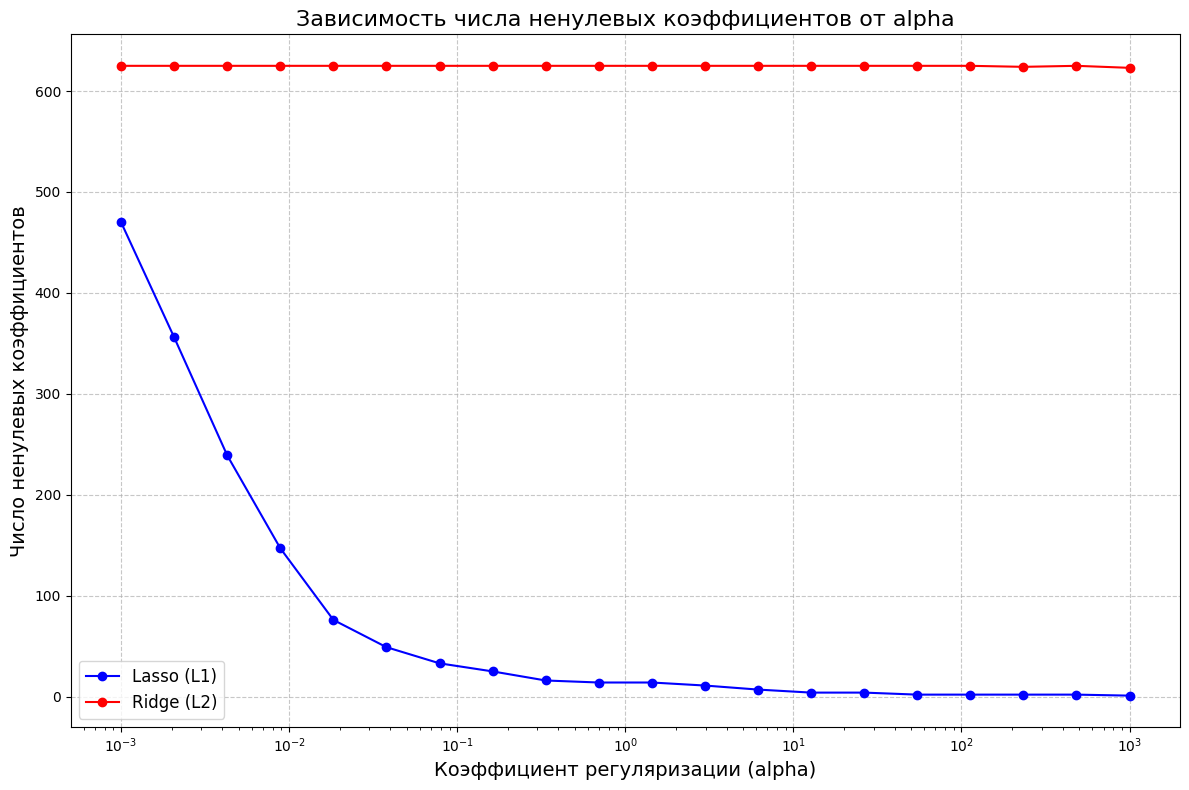

In [98]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Применяем функцию transform_data к признакам перед разделением
X_transformed = transform_data(X_final)

# Разделяем преобразованные данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

# Обучение Lasso и Ridge моделей с параметрами по умолчанию
lasso_model = Lasso(alpha=1.0, max_iter=10000, random_state=42)
lasso_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)  # Исправлено: y_train вместо y_test

# Анализ коэффициентов, близких к нулю
threshold = 1e-4  # Порог для определения "близости к нулю"

# Для Lasso
lasso_coefs = lasso_model.coef_
lasso_zero_coefs = np.sum(np.abs(lasso_coefs) < threshold)
lasso_nonzero_coefs = np.sum(np.abs(lasso_coefs) >= threshold)
total_coefs = len(lasso_coefs)

print(f"Lasso (alpha=1.0):")
print(f"Всего коэффициентов: {total_coefs}")
print(f"Коэффициентов, близких к нулю (|coef| < {threshold}): {lasso_zero_coefs}")
print(f"Ненулевых коэффициентов: {lasso_nonzero_coefs}")
print(f"Процент ненулевых коэффициентов: {lasso_nonzero_coefs/total_coefs*100:.2f}%")

# Для Ridge
ridge_coefs = ridge_model.coef_
ridge_zero_coefs = np.sum(np.abs(ridge_coefs) < threshold)
ridge_nonzero_coefs = np.sum(np.abs(ridge_coefs) >= threshold)

print(f"\nRidge (alpha=1.0):")
print(f"Всего коэффициентов: {total_coefs}")
print(f"Коэффициентов, близких к нулю (|coef| < {threshold}): {ridge_zero_coefs}")
print(f"Ненулевых коэффициентов: {ridge_nonzero_coefs}")
print(f"Процент ненулевых коэффициентов: {ridge_nonzero_coefs/total_coefs*100:.2f}%")

# Построение графика зависимости числа ненулевых коэффициентов от alpha
alphas = np.logspace(-3, 3, 20)  # Логарифмическая сетка от 10^-3 до 10^3
lasso_nonzero_counts = []
ridge_nonzero_counts = []

for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train, y_train)
    lasso_nonzero = np.sum(np.abs(lasso.coef_) >= threshold)
    lasso_nonzero_counts.append(lasso_nonzero)
    
    # Ridge
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    ridge_nonzero = np.sum(np.abs(ridge.coef_) >= threshold)
    ridge_nonzero_counts.append(ridge_nonzero)

# Построение графика
plt.figure(figsize=(12, 8))
plt.semilogx(alphas, lasso_nonzero_counts, 'b-o', label='Lasso (L1)')
plt.semilogx(alphas, ridge_nonzero_counts, 'r-o', label='Ridge (L2)')
plt.xlabel('Коэффициент регуляризации (alpha)', fontsize=14)
plt.ylabel('Число ненулевых коэффициентов', fontsize=14)
plt.title('Зависимость числа ненулевых коэффициентов от alpha', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [97]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Обучаем Ridge-регрессию с оптимальным alpha
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = ridge_model.predict(X_test)

# Рассчитываем метрики
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R^2 (коэффициент детерминации): {r2:.4f}")

# Дополнительно можно вывести интерпретацию метрик
print("\nИнтерпретация результатов:")
print(f"RMSE показывает среднюю ошибку прогноза в тех же единицах, что и целевая переменная (минуты).")
print(f"MAE показывает среднюю абсолютную ошибку прогноза без учета знака.")
print(f"R^2 показывает долю дисперсии целевой переменной, объясняемую моделью (от 0 до 1, чем ближе к 1, тем лучше).")

RMSE (Root Mean Squared Error): 34.0384
MAE (Mean Absolute Error): 17.5346
R^2 (коэффициент детерминации): 0.0966

Интерпретация результатов:
RMSE показывает среднюю ошибку прогноза в тех же единицах, что и целевая переменная (минуты).
MAE показывает среднюю абсолютную ошибку прогноза без учета знака.
R^2 показывает долю дисперсии целевой переменной, объясняемую моделью (от 0 до 1, чем ближе к 1, тем лучше).


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


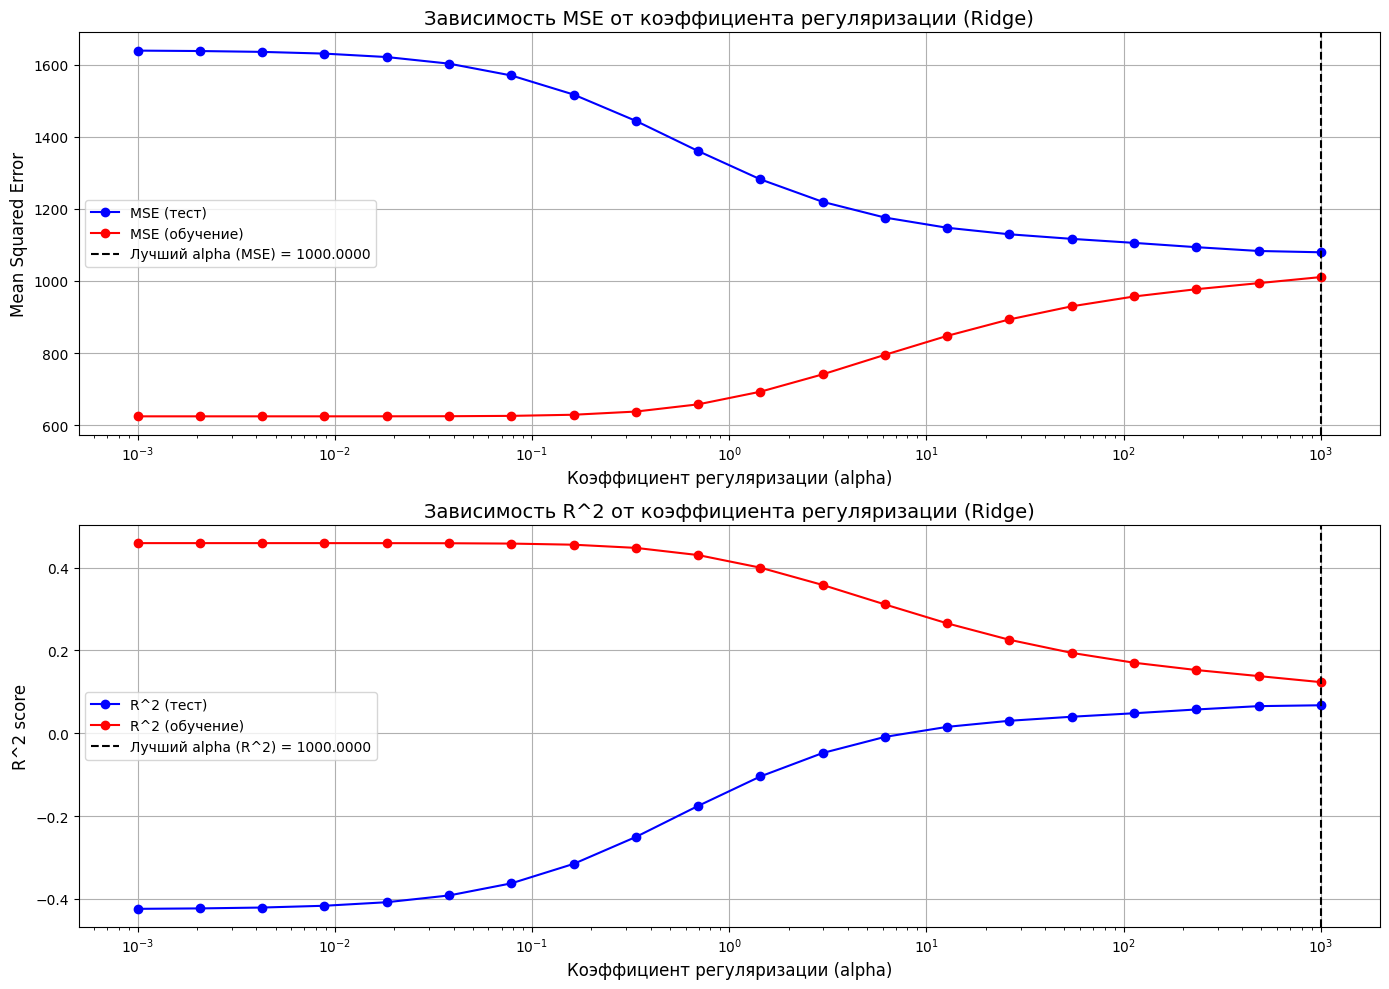

=== Ridge-регрессия с оптимальным alpha по MSE ===
Лучший alpha (MSE): 1000.0000
MSE на обучающей подвыборке (1000 объектов): 1015.20
R^2 на обучающей подвыборке (1000 объектов): 0.1196
MSE на тестовой выборке: 1176.79
R^2 на тестовой выборке: 0.0824

=== Ridge-регрессия с оптимальным alpha по R^2 ===
Лучший alpha (R^2): 1000.0000
MSE на обучающей подвыборке (1000 объектов): 1015.20
R^2 на обучающей подвыборке (1000 объектов): 0.1196
MSE на тестовой выборке: 1176.79
R^2 на тестовой выборке: 0.0824

=== Анализ изменения качества ===
Изменение MSE на обучающей выборке: 46.98%
Изменение MSE на тестовой выборке: -19.51%
Изменение R^2 на обучающей выборке: -70.18%
Изменение R^2 на тестовой выборке: -158.91%

=== Анализ коэффициентов Ridge-регрессии ===
Количество признаков: 630
Среднее значение коэффициентов (MSE): 0.044687
Среднее значение коэффициентов (R^2): 0.044687
Максимальный коэффициент (MSE): 3.266821
Максимальный коэффициент (R^2): 3.266821


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score

#Создаем сетку значений alpha
alphas = np.logspace(-3, 3, 20)  # Логарифмическая сетка от 10^-3 до 10^3

# Подготовка кросс-валидации с 5 фолдами
cv = KFold(n_splits=5, shuffle=True, random_state=42)

#Настройка GridSearchCV для MSE
param_grid = {'alpha': alphas}
ridge = Ridge(random_state=42)

#Поиск оптимального alpha по MSE
grid_search_mse = GridSearchCV(
    ridge, 
    param_grid=param_grid, 
    cv=cv, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
grid_search_mse.fit(X_train_subset, y_train_subset)

#Поиск оптимального alpha по R^2
grid_search_r2 = GridSearchCV(
    ridge, 
    param_grid=param_grid, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
grid_search_r2.fit(X_train_subset, y_train_subset)

# Получаем результаты кросс-валидации
cv_results_mse = pd.DataFrame(grid_search_mse.cv_results_)
cv_results_r2 = pd.DataFrame(grid_search_r2.cv_results_)

# Строим графики зависимости метрик от alpha
plt.figure(figsize=(14, 10))

# График для MSE
plt.subplot(2, 1, 1)
plt.semilogx(alphas, -cv_results_mse['mean_test_score'], 'b-o', label='MSE (тест)')
plt.semilogx(alphas, -cv_results_mse['mean_train_score'], 'r-o', label='MSE (обучение)')
plt.axvline(x=grid_search_mse.best_params_['alpha'], color='k', linestyle='--', label=f'Лучший alpha (MSE) = {grid_search_mse.best_params_["alpha"]:.4f}')
plt.xlabel('Коэффициент регуляризации (alpha)', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Зависимость MSE от коэффициента регуляризации (Ridge)', fontsize=14)
plt.legend()
plt.grid(True)

#График для R^2
plt.subplot(2, 1, 2)
plt.semilogx(alphas, cv_results_r2['mean_test_score'], 'b-o', label='R^2 (тест)')
plt.semilogx(alphas, cv_results_r2['mean_train_score'], 'r-o', label='R^2 (обучение)')
plt.axvline(x=grid_search_r2.best_params_['alpha'], color='k', linestyle='--', label=f'Лучший alpha (R^2) = {grid_search_r2.best_params_["alpha"]:.4f}')
plt.xlabel('Коэффициент регуляризации (alpha)', fontsize=12)
plt.ylabel('R^2 score', fontsize=12)
plt.title('Зависимость R^2 от коэффициента регуляризации (Ridge)', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Обучаем Ridge с лучшими alpha для каждой метрики
ridge_mse = Ridge(alpha=grid_search_mse.best_params_['alpha'], random_state=42)
ridge_mse.fit(X_train_subset, y_train_subset)

ridge_r2 = Ridge(alpha=grid_search_r2.best_params_['alpha'], random_state=42)
ridge_r2.fit(X_train_subset, y_train_subset)

# Предсказания и метрики для Ridge с оптимальным alpha по MSE
y_train_pred_mse = ridge_mse.predict(X_train_subset)
y_test_pred_mse = ridge_mse.predict(X_test)

mse_train_mse = mean_squared_error(y_train_subset, y_train_pred_mse)
r2_train_mse = r2_score(y_train_subset, y_train_pred_mse)
mse_test_mse = mean_squared_error(y_test, y_test_pred_mse)
r2_test_mse = r2_score(y_test, y_test_pred_mse)

# предсказания и метрики для Ridge с оптимальным alpha по R^2
y_train_pred_r2 = ridge_r2.predict(X_train_subset)
y_test_pred_r2 = ridge_r2.predict(X_test)

mse_train_r2 = mean_squared_error(y_train_subset, y_train_pred_r2)
r2_train_r2 = r2_score(y_train_subset, y_train_pred_r2)
mse_test_r2 = mean_squared_error(y_test, y_test_pred_r2)
r2_test_r2 = r2_score(y_test, y_test_pred_r2)

#Вывод результатов
print("=== Ridge-регрессия с оптимальным alpha по MSE ===")
print(f"Лучший alpha (MSE): {grid_search_mse.best_params_['alpha']:.4f}")
print(f"MSE на обучающей подвыборке (1000 объектов): {mse_train_mse:.2f}")
print(f"R^2 на обучающей подвыборке (1000 объектов): {r2_train_mse:.4f}")
print(f"MSE на тестовой выборке: {mse_test_mse:.2f}")
print(f"R^2 на тестовой выборке: {r2_test_mse:.4f}")

print("\n=== Ridge-регрессия с оптимальным alpha по R^2 ===")
print(f"Лучший alpha (R^2): {grid_search_r2.best_params_['alpha']:.4f}")
print(f"MSE на обучающей подвыборке (1000 объектов): {mse_train_r2:.2f}")
print(f"R^2 на обучающей подвыборке (1000 объектов): {r2_train_r2:.4f}")
print(f"MSE на тестовой выборке: {mse_test_r2:.2f}")
print(f"R^2 на тестовой выборке: {r2_test_r2:.4f}")

#Анализ изменения качества
print("\n=== Анализ изменения качества ===")
mse_train_change = ((mse_train_ridge - mse_train_lr) / mse_train_lr) * 100
mse_test_change = ((mse_test_ridge - mse_test_lr) / mse_test_lr) * 100
r2_train_change = ((r2_train_ridge - r2_train_lr) / r2_train_lr) * 100
r2_test_change = ((r2_test_ridge - r2_test_lr) / r2_test_lr) * 100

print(f"Изменение MSE на обучающей выборке: {mse_train_change:.2f}%")
print(f"Изменение MSE на тестовой выборке: {mse_test_change:.2f}%")
print(f"Изменение R^2 на обучающей выборке: {r2_train_change:.2f}%")
print(f"Изменение R^2 на тестовой выборке: {r2_test_change:.2f}%")

#Анализ коэффициентов модели
print("\n=== Анализ коэффициентов Ridge-регрессии ===")
print(f"Количество признаков: {X_train_subset.shape[1]}")
print(f"Среднее значение коэффициентов (MSE): {np.mean(np.abs(ridge_mse.coef_)):.6f}")
print(f"Среднее значение коэффициентов (R^2): {np.mean(np.abs(ridge_r2.coef_)):.6f}")
print(f"Максимальный коэффициент (MSE): {np.max(np.abs(ridge_mse.coef_)):.6f}")
print(f"Максимальный коэффициент (R^2): {np.max(np.abs(ridge_r2.coef_)):.6f}")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

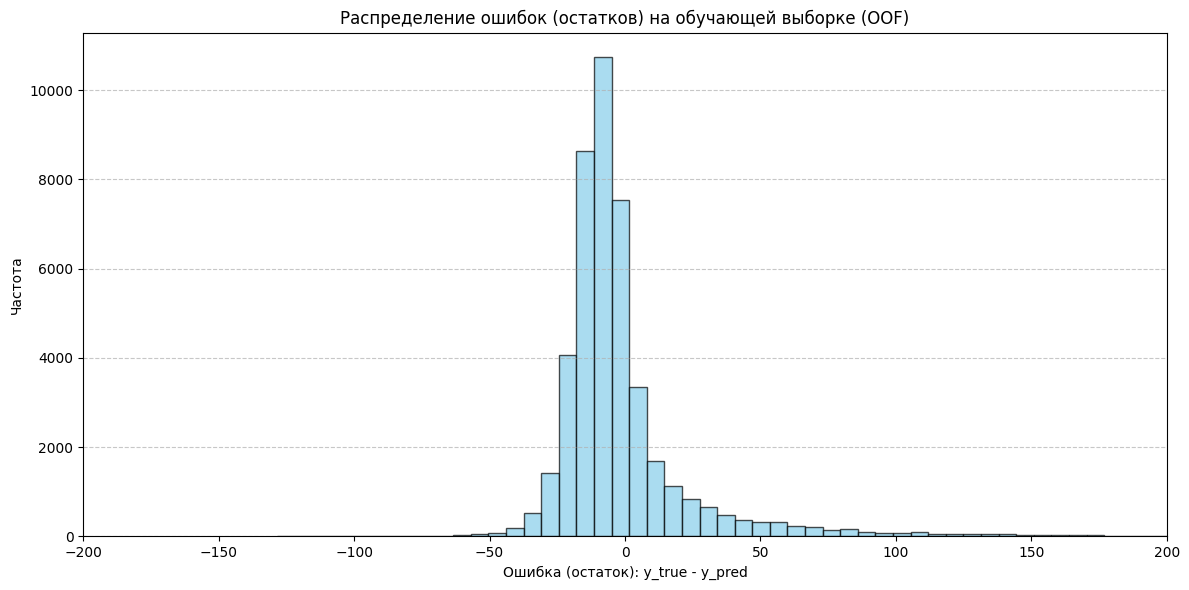

Статистика ошибок (остатков):
Среднее: -0.01
Медиана: -7.24
Стандартное отклонение: 34.08
Минимум: -128.38
Максимум: 1170.56

Процент ошибок с |ошибка| > 100 минут: 2.00%


In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict, KFold

# Используем Ridge-регрессию с умерённой регуляризацией
ridge = Ridge(alpha=1.0, random_state=42)

# Создаём 5-фолдовую разбивку
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Получаем out-of-fold предсказания на обучающей выборке
y_train_pred_oof = cross_val_predict(ridge, X_train, y_train, cv=cv, n_jobs=-1)

# Считаем ошибки (остатки)
residuals = y_train - y_train_pred_oof

# строим гистограмму ошибок
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=200, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Ошибка (остаток): y_true - y_pred')
plt.ylabel('Частота')
plt.title('Распределение ошибок (остатков) на обучающей выборке (OOF)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ограничиваем ось X для лучшей читаемости (большинство ошибок в разумных пределах)
plt.xlim(-200, 200)
plt.tight_layout()
plt.show()

#статистика по ошибкам
print("Статистика ошибок (остатков):")
print(f"Среднее: {np.mean(residuals):.2f}")
print(f"Медиана: {np.median(residuals):.2f}")
print(f"Стандартное отклонение: {np.std(residuals):.2f}")
print(f"Минимум: {np.min(residuals):.2f}")
print(f"Максимум: {np.max(residuals):.2f}")

# Процент ошибок с абсолютным значением > 100 минут
large_errors = np.abs(residuals) > 100
print(f"\nПроцент ошибок с |ошибка| > 100 минут: {large_errors.mean()*100:.2f}%")

In [ ]:
Что видим:
Большинство ошибок сосредоточено около нуля, но есть редкие, но очень большие ошибки — до 1000 минут и более.
Распределение не является нормальным — оно сильно смещено и имеет выбросы.
MSE будет доминироваться этими выбросами, потому что он штрафует пропорционально квадрату ошибки. Например, ошибка в 500 минут вносит в MSE в 2500 раз
больший вклад, чем ошибка в 10 минут.
Такие выбросы вызваны реальными аномалиями в данных:
Рейсы с задержками на несколько часов (например, из-за экстремальной погоды, забастовок, технических сбоев)
Ошибки в данных (редко, но бывает)